## Script to generate training, test dataset
This script load files generated by the run model and create a dataset for the neural network

In [1]:
from neuralsw.model.datatools import mydata
import numpy as np
import os

In [2]:
#Reference dataset (uncomment the one you want)

#rootdir
rootdir = os.path.realpath(\
    os.path.join(os.getcwd(),'../..'))

#directory to store the data
datadir = os.path.realpath(os.path.join(rootdir,'data'))

#Liste of available datasets
datafile = 'train_dataset_std.nc'
#datafile = 'test_dataset_std.nc'
#datafile = 'test_dataset_windvar.nc'
#datafile = 'test_dataset_warsmooth.nc'

#detect prefix and suffix
pref = datafile.split('_')[0]
suf  = datafile.split('_')[-1].split('.')[0]

In [3]:
#define params for generating dataset
allparams = {0:{'suf':'nonoise','outfield':'uparam','infield':['uphy','hphy','taux'],'in_noise':0,'out_noise':0},
             1:{'suf':'noise01','outfield':'uparam','infield':['uphy','hphy','taux'],'in_noise':0.1,'out_noise':0.1},
             2:{'suf':'nonoise','outfield':'vparam','infield':['vphy','hphy','tauy'],'in_noise':0,'out_noise':0},
             3:{'suf':'noise01','outfield':'vparam','infield':['vphy','hphy','tauy'],'in_noise':0.1,'out_noise':0.1}}

selected = 0

dpar = allparams[selected]

outname = '_'.join([pref,dpar['outfield'],dpar['suf'],suf])
fname = os.path.join(datadir,outname)
print ('output name:',fname)

output name: /net/argos/data/parvati/jbrlod/jbrlod/these/postdoc/collaborations/bigdata/sw/data/train_uparam_nonoise_std


In [4]:
#Generate the training set
app = mydata(os.path.join(datadir,datafile),
            outfield=dpar['outfield'],
            infield=dpar['infield'],
            forcfield=[],
            dt=1)
app.make_base_im()

In [5]:
## add noise
if dpar['in_noise']>0:
    for i in range(app._X.shape[-1]):
        et = app._X[:,:,:,i].ravel().std()
        eps = np.random.normal(0,et*dpar['in_noise'],size=app._X[:,:,:,i].shape)
        app._X[:,:,:,i]+=eps
if dpar['out_noise']>0:
    et = app._y.ravel().std()
    eps = np.random.normal(0,et*dpar['out_noise'],size=app._y.shape)
    app._y += eps

In [6]:
## save dataset 
app.save_base(fname)

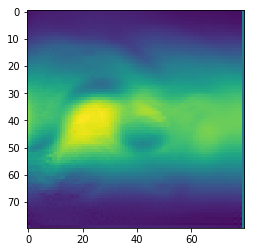

(480, 80, 80, 3)

In [9]:
import matplotlib.pyplot as plt
plt.imshow(app._y[-1,:,:,0]);
plt.show()
app._X.shape

In [8]:
app.data

<xarray.Dataset>
Dimensions:  (time: 960, x: 80, y: 80)
Coordinates:
  * x        (x) float64 -8e+05 -7.797e+05 -7.595e+05 -7.392e+05 -7.19e+05 ...
  * y        (y) float64 -8e+05 -7.797e+05 -7.595e+05 -7.392e+05 -7.19e+05 ...
  * time     (time) int64 0 1 1440 1441 2880 2881 4320 4321 5760 5761 7200 ...
Data variables:
    taux     (time, y, x) float64 ...
    vparam   (time, y, x) float64 ...
    uparam   (time, y, x) float64 ...
    uphy     (time, y, x) float64 ...
    vphy     (time, y, x) float64 ...
    hphy     (time, y, x) float64 ...
    tauy     (time, y, x) float64 ...
Attributes:
    dx:       20000.0
    dt:       1800
    alpha:    0.025
    ny:       80
    f0:       3.5e-05
    beta:     2.11e-11
    gamma:    2e-07
    H:        500
    warg:     {}
    nu:       0.72
    dy:       20000.0
    rho0:     1000
    gstar:    0.02
    nx:       80
    fwind:    <neuralsw.model.shalw.wind object at 0x7f199767aba8>